# Prime Notebook for Analysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import preprocessing
plt.style.use('ggplot')

# Load Data

In [48]:
dailyprice = pd.read_csv('../Data/StockPriceDaily.csv')

In [53]:
returns=data.set_index('Date').pct_change()
returns.head()

SYMBOL        AGL.JO    AMS.JO  ANH.JO    APN.JO  BGA.JO  BID.JO    BIL.JO  \
Date                                                                         
2012-01-02       NaN       NaN     NaN       NaN     NaN     NaN       NaN   
2012-01-03  0.051351  0.022970     NaN  0.025031     NaN     NaN  0.061671   
2012-01-04  0.009415 -0.007754     NaN -0.002220     NaN     NaN  0.013065   
2012-01-05 -0.010410  0.000000     NaN  0.001214     NaN     NaN -0.017858   
2012-01-06 -0.005790  0.003704     NaN  0.013636     NaN     NaN -0.003635   

SYMBOL        BTI.JO    BVT.JO    CFR.JO    ...       RMI.JO  S32.JO  \
Date                                        ...                        
2012-01-02       NaN       NaN       NaN    ...          NaN     NaN   
2012-01-03  0.003938  0.024030  0.045376    ...     0.011940     NaN   
2012-01-04  0.005195  0.001767 -0.002816    ...     0.013274     NaN   
2012-01-05 -0.006253  0.007557 -0.006824    ...     0.009461     NaN   
2012-01-06 -0.005278  0.018188 -0.004975    ...     0.010094     NaN   

SYMBOL        SBK.JO    SHP.JO    SLM.JO    SOL.JO  SRR.JO    TBS.JO  \
Date                                                                   
2012-01-02       NaN       NaN       NaN       NaN     NaN       NaN   
2012-01-03  0.016810  0.015198  0.026690  0.014267     NaN  0.016422   
2012-01-04  0.005876  0.004122 -0.011816  0.007647     NaN  0.000431   
2012-01-05 -0.010891 -0.023624  0.015716 -0.018249     NaN -0.006311   
2012-01-06  0.007908 -0.011508  0.010764  0.001086     NaN  0.001972   

SYMBOL        VOD.JO    WHL.JO  
Date                            
2012-01-02       NaN       NaN  
2012-01-03  0.020337  0.023076  
2012-01-04 -0.005506 -0.000503  
2012-01-05 -0.008969 -0.002507  
2012-01-06  0.022235  0.004024  

[5 rows x 40 columns]

In [4]:
dailyprice.head()

Date    Open         High          Low   Close    Adj Close  Volume  \
0  2016-01-15  1938.0  1960.000000  1922.000000  1944.0  1929.369019  831540   
1  2016-01-18  1955.0  1981.910034  1946.099976  1974.5  1959.639526  627259   
2  2016-01-19  2075.0  2075.000000  1972.500000  2006.0  1990.902344  421639   
3  2016-01-20  2007.5  2108.000000  1945.380005  1963.0  1948.226196  283701   
4  2016-01-21  1955.0  1999.959961  1930.000000  1940.0  1925.399048  360968   

   SYMBOL  
0  ANH.JO  
1  ANH.JO  
2  ANH.JO  
3  ANH.JO  
4  ANH.JO

In [4]:
dailyprice.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
SYMBOL        object
dtype: object

# Convert 'Date' to Datetime

In [56]:
dailyprice['Date']=pd.to_datetime(dailyprice.Date)
dailyprice.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
SYMBOL               object
dtype: object

# Remove Unneccesary Columns

In [57]:
dailyprice = dailyprice[['Date','Close','SYMBOL']]

In [87]:
dailyprice.sort_values("Date", ascending=False,inplace=True)
dailyprice.head()

Date       Close  SYMBOL
57492 2018-08-01  194.250000  CLS.JO
10401 2018-08-01  296.839996  AGL.JO
15519 2018-08-01  514.690002  SOL.JO
36873 2018-08-01  285.690002  KIO.JO
43642 2018-08-01  119.540001  NRP.JO

# Quick plot of the sum of all values 

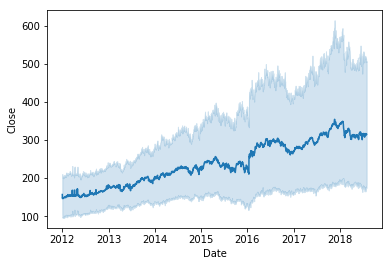

<Figure size 864x864 with 0 Axes>

In [8]:
sns.lineplot(x='Date',y='Close', data=dailyprice)
plt.figure(figsize=(12,12))
plt.show()

# Join company data to date so each company has it's own column 

In [89]:
df = dailyprice.groupby('Date',as_index=False).sum()
df["Date"] = pd.to_datetime(df['Date'])

for company in list(dailyprice.SYMBOL.unique()):
    data=dailyprice[dailyprice.SYMBOL==company]
    data[company]=data['Close']
    data.Date=pd.to_datetime(data.Date)
    df = pd.merge(df,data[['Date',company]],how='inner',on='Date')
    #df[company==0][company]=np.nan

C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


# Normalize all columns so that they can be compared despite price differences from a scale of 1 to 100

In [91]:
for i in list(df.select_dtypes(include='float').columns):
    scaler =  preprocessing.MinMaxScaler()
    df[i]=scaler.fit_transform(df[[i]])

# Plot each companies distributions

No handles with labels found to put in legend.


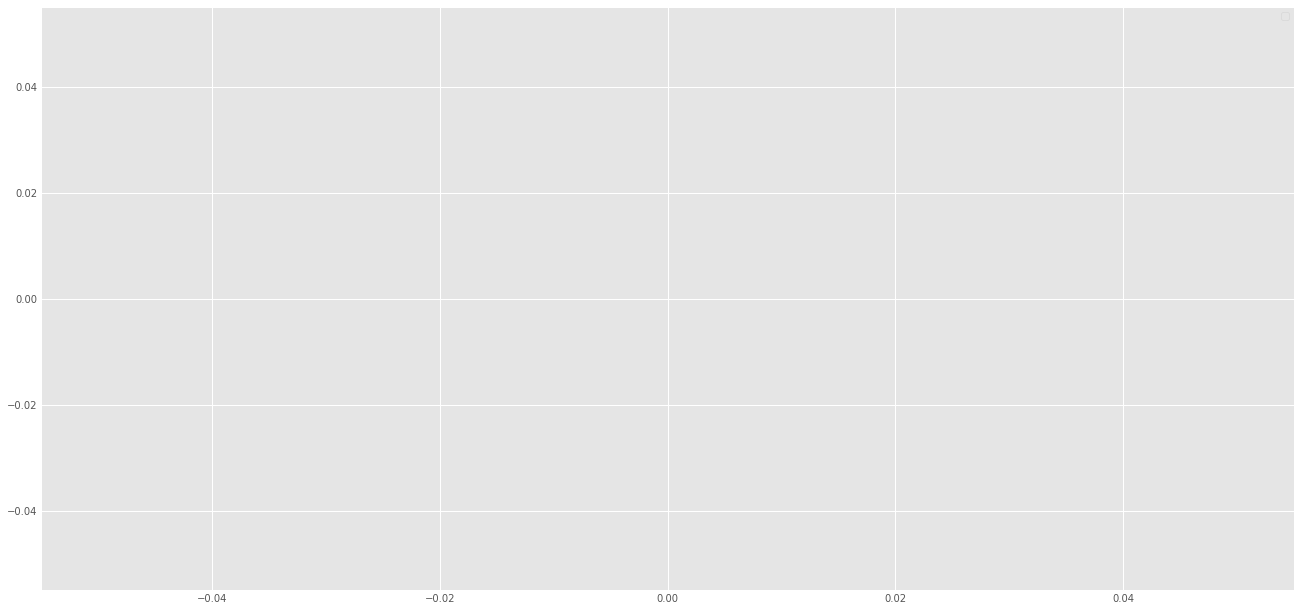

In [102]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))


n=1
for i in list(df.select_dtypes(include='float').columns):
    color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
    c=next(color)
    #sns.kdeplot(df[i],shade=False)
    plt.plot(x=df['Date'],y=df[i],c=c, label=i)
    n=+1
    
plt.legend()

plt.show()

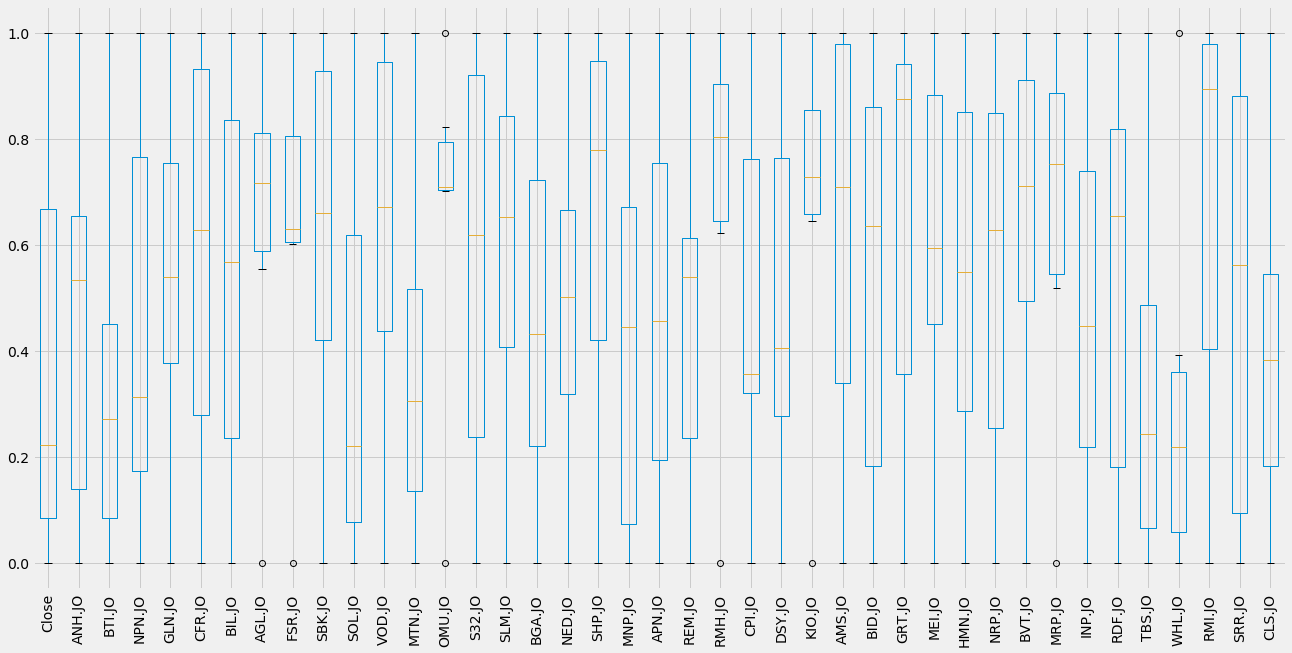

In [12]:
plt.figure(figsize=(20,10))

df.boxplot()

plt.xticks(rotation=90)

plt.show()

# Inter-Company Correlations

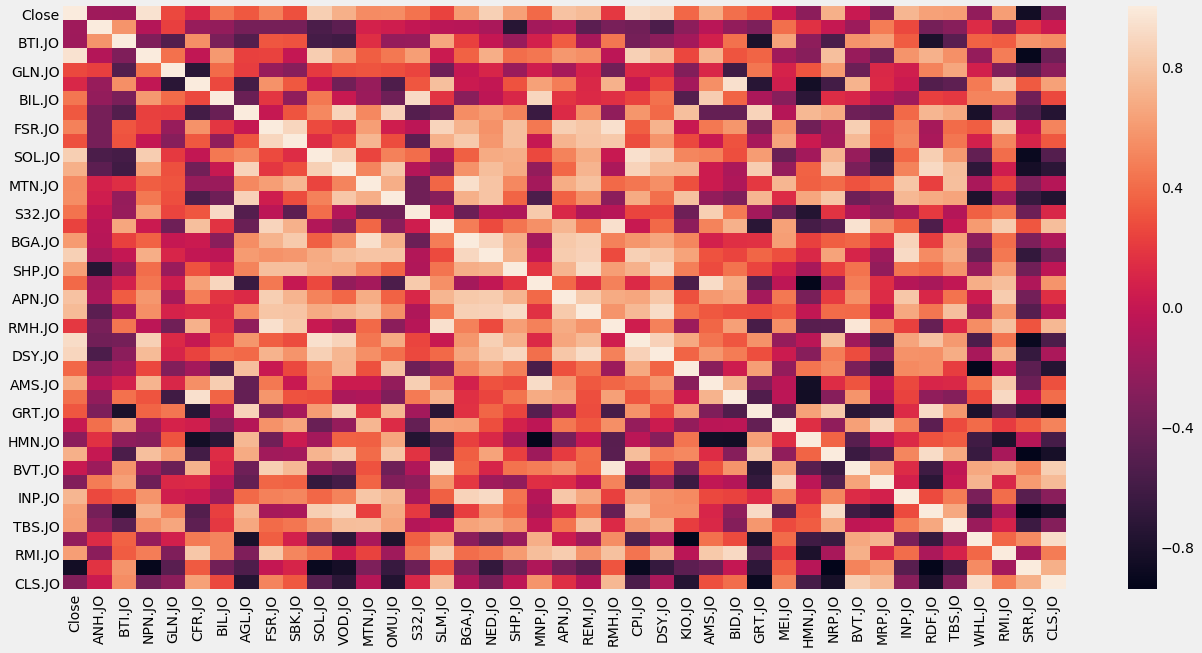

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

plt.show()

# Organize companies into clusters with hierarchal clustering (seen in dendograms)

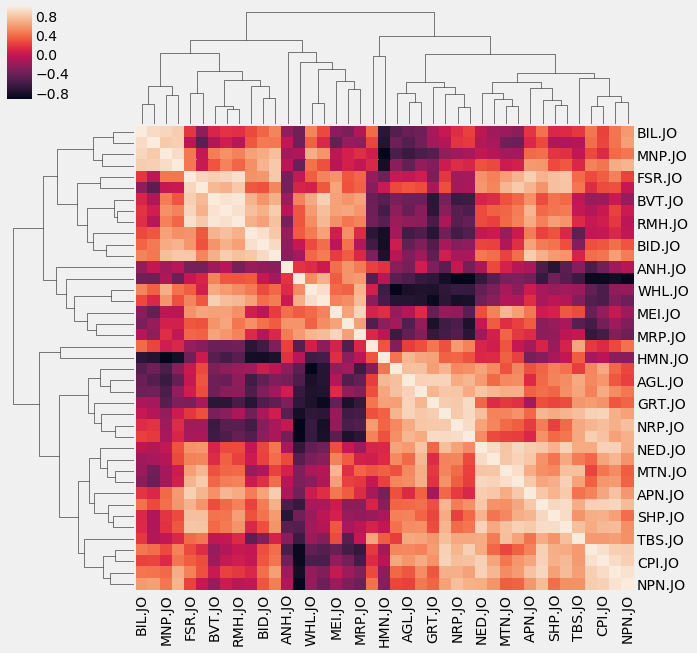

In [14]:
sns.clustermap(df.corr(), col_cluster=True)

plt.show()

# Visually plot network of companies with correlation coefficient greater than 0.6

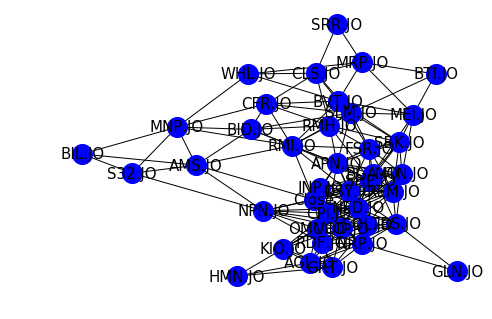

In [15]:
import networkx as nx

# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()


# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

# Plot the network:
nx.draw(G, node_color='Blue' , with_labels=True, node_size=400, edge_color='Black',edge_cmap=plt.cm.Blues, linewidths=1, font_size=15)


# Hierarchal Clusters of firms
Interestingly their correlation does not always have industry sector as a common element between clustered firms  

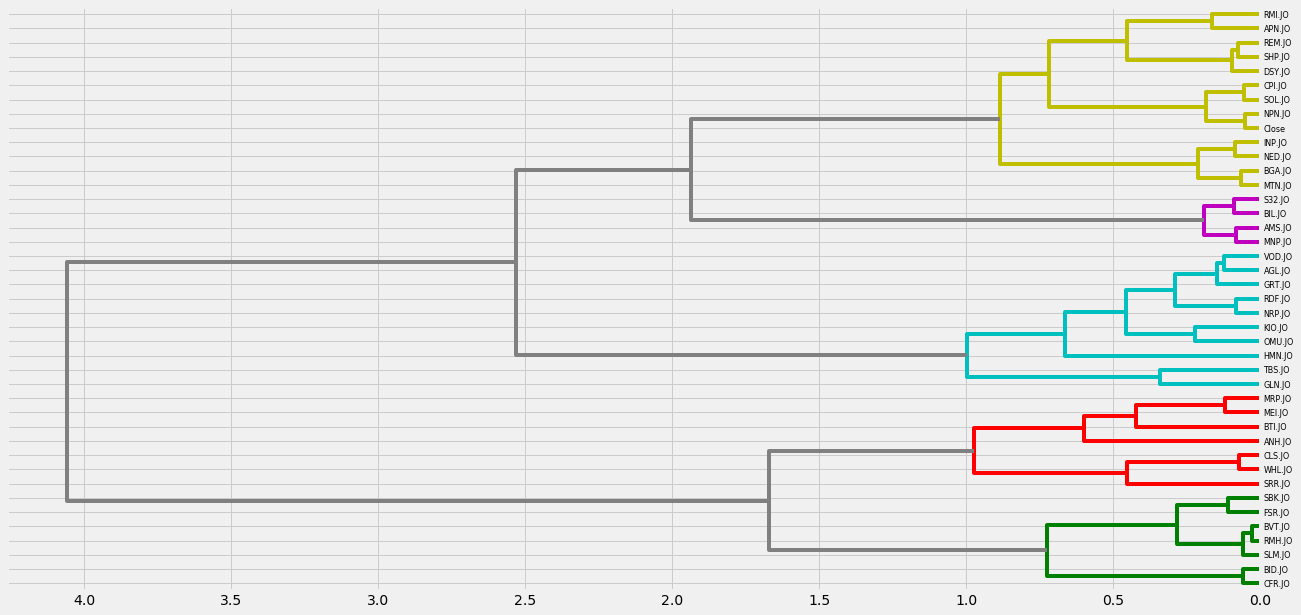

In [16]:
from scipy.cluster import hierarchy
corr = 1 - df.corr()
#Z = hierarchy.linkage(dataset1, 'ward')

#hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=dataset1.idnex)
plt.figure(figsize=(20,10))
corr_condensed = hierarchy.distance.squareform(corr) # convert to condensed
z = hierarchy.linkage(corr_condensed, method='ward')
dendrogram = hierarchy.dendrogram(z, labels=corr.columns, above_threshold_color='grey', orientation='left', color_threshold=1.0)
plt.show()

# Markowitz Portfolio

In [111]:
df = dailyprice.groupby('Date',as_index=False).sum()
df["Date"] = pd.to_datetime(df['Date'])

for company in list(dailyprice.SYMBOL.unique()):
    data=dailyprice[dailyprice.SYMBOL==company]
    data[company]=data['Close']
    data.Date=pd.to_datetime(data.Date)
    df = pd.merge(df,data[['Date',company]],how='inner',on='Date')
    df[company==0]=np.nan

C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
df.min()

In [112]:
#df = df.set_index('Date')
df.resample('')
df.head()

Date         Close      CLS.JO  False      AGL.JO      SOL.JO  \
0 2018-07-03  12455.040047  203.020004    NaN  296.440002  500.000000   
1 2018-07-04  12507.559915  199.259995    NaN  303.000000  501.000000   
2 2018-07-05  12441.800135  197.149994    NaN  308.269989  505.640015   
3 2018-07-06  12480.780034  193.789993    NaN  304.570007  503.000000   
4 2018-07-09  12676.430006  197.500000    NaN  306.290009  514.330017   

       KIO.JO      NRP.JO     MEI.JO      SBK.JO     ...          VOD.JO  \
0  301.010010  122.260002  96.000000  194.419998     ...      123.000000   
1  319.440002  122.779999  97.150002  198.050003     ...      126.000000   
2  316.679993  123.419998  95.849998  197.070007     ...      128.979996   
3  315.529999  124.550003  95.330002  192.000000     ...      127.099998   
4  314.390015  124.930000  97.239998  197.800003     ...      130.500000   

       APN.JO      BIL.JO     GLN.JO      TBS.JO      AMS.JO      REM.JO  \
0  264.000000  304.070007  58.540001  333.000000  369.570007  208.009995   
1  266.170013  295.649994  57.790001  333.239990  361.329987  210.250000   
2  263.529999  297.399994  58.560001  338.000000  353.320007  210.470001   
3  262.829987  298.329987  58.950001  334.700012  358.390015  207.179993   
4  267.040009  302.540009  59.200001  342.109985  370.450012  213.070007   

        NPN.JO      BTI.JO      BGA.JO  
0  3415.000000  705.130005  163.759995  
1  3408.000000  712.549988  166.970001  
2  3388.860107  697.510010  165.669998  
3  3438.530029  701.400024  164.419998  
4  3510.000000  701.809998  167.750000  

[5 rows x 43 columns]